# Lift

This section is about estimating the lift model for the example airplane. At the conceptual phase, a simple lift model can be written as 

$$
    C_L = C_{L_\alpha} (\alpha - \alpha_{L=0}),
$$

where $C_{L_\alpha}$ is the lift curve slope and $\alpha_{L=0}$ is the angle of attack where the lift is zero. The $\alpha_{L=0}$ is zero for an uncambered wing while it is non-zero for cambered wing. The $\alpha_{L=0}$ can be approximated as the airfoil $\alpha_{l=0}$ at mean chord location. Or $\alpha_{L=0}$ can also be set to zero for simplifying the analysis. Note that this model is only for linear region of the lift curve.

## Lift curve slope

The most important parameter in this model is the lift curve slope. In the conceptual phase, it is important to estimate $C_{L_\alpha}$. This is later used for setting wing incidence angle, computing drag polar, and in longitudinal stability analysis. The $C_{L_\alpha}$ is estimated (in 1/radian) using a semi-empirical equation, written as

$$
    C_{L_\alpha} = \frac{2\pi A}{2 + \sqrt{4 + \dfrac{A^2\beta^2}{\eta^2} \bigg( 1 + \dfrac{\tan^2(\Lambda_{max,t/c})}{\beta^2} \bigg) }} \bigg(\frac{S_{exposed}}{S_{ref}}\bigg) F,
$$

where A is the aspect ratio, $\beta$ is the compressibility correction factor, given as 

$$
    \beta = \sqrt{1 - M^2},
$$

where $M$ is the free-stream mach number. The $\eta$ is the airfoil efficiency factor defined as

$$
    \eta = \frac{C_{l_\alpha}}{2\pi/\beta},
$$

where $C_{l_\alpha}$ is the airfoil lift curve slope in 1/radian. The $\Lambda_{max,t/c}$ is the sweep angle at the chord fraction corresponding to maximum thickness. The $S_{exposed}$ is defined as the wing reference area not covered by fuselage, while $S_{ref}$ is the wing planform area (already computed). The $F$ is the fuselage lift-factor given by

$$
    F = 1.07(1 + d/b)^2,
$$

where $d$ is the fuselage width and $b$ is the wing span.

> __*NOTE*__: The maximum value of the product of $F$ and $S_{exposed}/S_{ref}$ should not be more than 1

Below table summarizes various quantities for the example airplane that will be used for computing the lift-curve slope:

<div style="width:100%; margin: auto;">

Parameter | Value | Source
---- | :----: | :----:
Aspect ratio, $A$ | 8 | from initial weight estimation
Free stream mach number, $M$ | 0.3 | cruise condition, 200 knots at 8000 ft
Airfoil efficiency, $\eta$ | 1.0 | assuming (Raymer 12.4.1)
Wing span, $b$ | 33 ft | from wing planform section
Fuselage width | 5 ft | from fuselage sizing section
Wing reference area, $S_{ref}$ | 134 $\text{ft}^2$ | from constraint analysis
Exposed reference area, $S_{exposed}$ | 106 $\text{ft}^2$ | calculated using wing geometry and fuselage width
Sweep at max camber, $\Lambda_{max,t/c}$ | $\sim 0^{\circ}$ | since max t/c at 30% and $\Lambda_{25\%} = 0^{\circ}$
Zero-lift angle of attack, $\alpha_{L=0}$ | $-1.0^{\circ}$ | approximated from airfoil data
</div>

Below code computes the lift curve slope at in clean configuration and cruise conditions:

In [11]:
# Variables
PI = 3.14159
A = 8
M = 0.3
b = 33 # ft
d = 5 # ft
S_ref = 134 # sq ft
S_exposed = 106 # sq ft

beta = (1 - M**2)**0.5
eta = 1.0
F = 1.07*(1 + d/b)**2

# Lift-curve slope - airplane
numerator = 2*PI*A*min(S_exposed*F/S_ref,0.98)
denominator = 2 + (4 + (A*beta/eta)**2)**0.5 # tan term is removed since tan(0) = 0

CLalpha = numerator / denominator

print(f"Lift-curve slope for airplane: {CLalpha:.2} 1/rad")

Lift-curve slope for airplane: 5.0 1/rad


## Maximum $C_L$ (clean)

Along with lift-curve slope, it is important to compute the maximum $C_L$ that the airplane can achieve in clean configuration (without the use of high-lift devices). It is very challenging to estimate maximum $C_L$ even with wind tunnel experiments. In this sub-section, semi-empirical methods are used to get an estimate for maximum lift coefficient. As described in Raymer Section 12.4.5, following equation can be used for computing the maximum $C_L$:

$$
    C_{L_{max}} = C_{l_{max}} \bigg( \frac{C_{L_{max}}}{C_{l_{max}}} \bigg) + \Delta C_{L_{max}},
$$

where $C_{l_{max}}$ is the maximum $C_l$ for the airfoil in similar flow conditions. The first term represents maximum $C_L$ at Mach 0.2, while the second term is used as a correction factor for higher Mach number. Accordingly, angle of attack at maximum $C_L$ can be computed as:

$$
    \alpha_{C_{L_{max}}} = \frac{C_{L_{max}}}{C_{L_\alpha}} + \alpha_{L=0} + \Delta \alpha_{C_{L_{max}}},
$$

where $\Delta \alpha_{C_{L_{max}}}$ is the change in $\alpha$ due to the nonlinear affects near stall. Refer to Raymer Section 12.4.5 for further details. 

Following table summarizes the required quantities for computing $C_{L_{max}}$ and $\alpha_{C_{L_{max}}}$:

<div style="width:70%; margin: auto;">

Parameter | Value | Source
---- | :----: | :----:
$C_{l_{max}}$ | 1.88 | XFOIL analysis for NACA 23018
$\alpha_{L=0}$ | $-1.0^{\circ}$ | approximated from airfoil data
$C_{L_\alpha}$ | 5 $\text{ rad}^{-1}$ | calculated
$C_{L_{max}}/C_{l_{max}} $ | 0.9 | Fig. 12.9, Raymer
$\Delta C_{L_{max}}$ | -0.25 | Fig. 12.10, Raymer
$\Delta \alpha_{C_{L_{max}}}$ | $2.5^{\circ}$ | Fig. 12.11, Raymer

</div>

Below code block computes maximum $C_L$ and corresponding $\alpha$ for the example airplane:

In [12]:
# Variables
Clmax = 1.88
alpha_zero_lift = -1.0
maxCl_ratio = 0.9
delta_CLmax = -0.25
detla_alpha_CLmax = 2.5

# maximum CL
CLmax = Clmax * maxCl_ratio + delta_CLmax

# alpha at max CL
alpha_CLmax = CLmax/CLalpha*180/PI + alpha_zero_lift + detla_alpha_CLmax

# Print
print(f"Maximum lift coefficient: {CLmax:.3}")
print(f"Alpha at maximum lift coefficient: {alpha_CLmax:.3}")

Maximum lift coefficient: 1.44
Alpha at maximum lift coefficient: 18.1


> __*NOTE*__: The $C_{L_{max}}$ obtained above is very close to the value of 1.5 assumed in constraint analysis section

## Lift curve plot

Below code block plots lift curve, along with a point denoting $C_{L_{max}}$ and $\alpha_{C_{L_{max}}}$, for a range of $\alpha$ values:

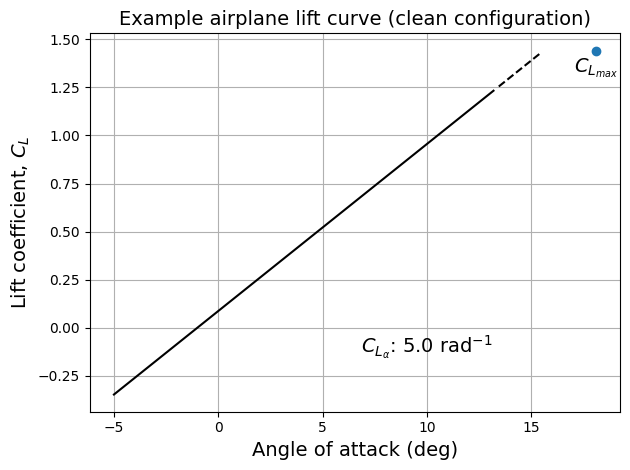

In [28]:
import numpy as np
import matplotlib.pyplot as plt

fs = 14 # fontsize
alpha = np.linspace(-5,20,100) * PI/180 # alpha values, rad
alpha_CLzero = -1.0 # assumed, deg

CL = CLalpha * (alpha - alpha_CLzero * PI/180)

# Splitting data based on linear and nonlinear region
CL_linear = CL[CL<=1.25]
alpha_linear = alpha[CL<=1.25]

CL_nonlinear = CL[np.logical_and(CL>1.25,CL<CLmax)]
alpha_nonlinear = alpha[np.logical_and(CL>1.25,CL<CLmax)]

fig, ax = plt.subplots()
ax.plot(alpha_linear*180/PI, CL_linear, "k-")
ax.plot(alpha_nonlinear*180/PI, CL_nonlinear, "k--")
ax.scatter(alpha_CLmax, CLmax)
ax.set_xlabel("Angle of attack (deg)", fontsize=fs)
ax.set_ylabel("Lift coefficient, $C_L$", fontsize=fs)
ax.set_title("Example airplane lift curve (clean configuration)", fontsize=fs)
ax.annotate(r"$C_{L_\alpha}$: " + f"{CLalpha:.2} " + r"$\text{rad}^{-1}$", (10,-0.1), fontsize=fs, ha="center", va="center")
ax.annotate("$C_{L_{max}}$", (18.1,1.35), fontsize=fs, ha="center", va="center")
ax.grid()
plt.tight_layout()

This concludes the lift section for the example airplane. Lift with high-lift devices will be covered later.